# _Dataset cleaning : Ratings_

## . Import Libraries

In [27]:
import math
import matplotlib.pyplot as plt
import numpy as np
import os, sys
import pandas as pd
import re
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')
#pd.set_option('display.max_colwidth', -1) =>check what it is actually doing

# Dataset has 271361 rows, jupyter notebook is crashing 
#if I don't limit the number of rows displayed below.
pd.set_option('display.max_columns', 1000) 
pd.set_option('display.max_rows', 1000)
pd.options.display.max_columns = 1000

##  . _Import Data_

In [2]:
ratings = pd.read_csv('ratings.csv')
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [12]:
users_f = pd.read_csv('users_final.csv')
books_f = pd.read_csv('books_final.csv')

##  . _Data Exploring_

Explore and check the dataset, it is necessary to know your dataset before starting cleaning or 
dropping information.

In [3]:
ratings.shape

(1149780, 3)

Type of data:

In [13]:
ratings.dtypes

user_id         int64
isbn           object
book_rating     int64
dtype: object

In [14]:
ratings.info

<bound method DataFrame.info of          user_id         isbn  book_rating
0         276725   034545104X            0
1         276726   0155061224            5
2         276727   0446520802            0
3         276729   052165615X            3
4         276729   0521795028            6
...          ...          ...          ...
1149775   276704   1563526298            9
1149776   276706   0679447156            0
1149777   276709   0515107662           10
1149778   276721   0590442449           10
1149779   276723  05162443314            8

[1149780 rows x 3 columns]>

Column's names :

In [15]:
ratings.columns

Index(['user_id', 'isbn', 'book_rating'], dtype='object')

In [ ]:
Looking for null datas

In [16]:
ratings.isna().sum()

user_id        0
isbn           0
book_rating    0
dtype: int64

##  . _Data Cleaning_

Clean the column name by removing the symbols, setting the names in the same format 
(lower case and replace space by _ etc...)

In [8]:
ratings.columns = [column.lower().replace('-', '_') for column in ratings.columns]

In [9]:
# Check the column 
list(ratings.columns)

['user_id', 'isbn', 'book_rating']

In [17]:
#ratings dataset will have n_users*n_books entries if every user rated every item, this shows that the dataset is very sparse
n_users = users_f.shape[0]
n_books = books_f.shape[0]
n_users * n_books

75670906880

In [23]:
ratings['book_rating'].unique()

array([ 0,  5,  3,  6,  8,  7, 10,  9,  4,  1,  2], dtype=int64)

In [20]:
#ratings dataset should have books only which exist in our books dataset, unless new books are added to books dataset
ratings_new = ratings[ratings.isbn.isin(books_f.isbn)]

ratings.shape,ratings_new.shape
#it can be seen that many rows having book ISBN not part of books dataset got dropped off

((1149780, 3), (1031136, 3))

In [22]:
#ratings dataset should have ratings from users which exist in users dataset, unless new users are added to users dataset
ratings = ratings[ratings['user_id'].isin(users_f['user_id'])]

print(ratings.shape)
print(ratings_new.shape)
#no new users added, hence we will go with above dataset ratings_new (1031136, 3)

(n_users), (n_books)

(1149780, 3)
(1031136, 3)


(278858, 271360)

In [24]:
ratings['book_rating'].unique()

array([ 0,  5,  3,  6,  8,  7, 10,  9,  4,  1,  2], dtype=int64)

In [28]:
#Hence segragating implicit and explict ratings datasets
ratings_explicit = ratings_new[ratings_new['book_rating'] != 0]
ratings_implicit = ratings_new[ratings_new['book_rating'] == 0]

(1031136, 3)
(383842, 3)
(647294, 3)


<AxesSubplot:xlabel='book_rating', ylabel='count'>

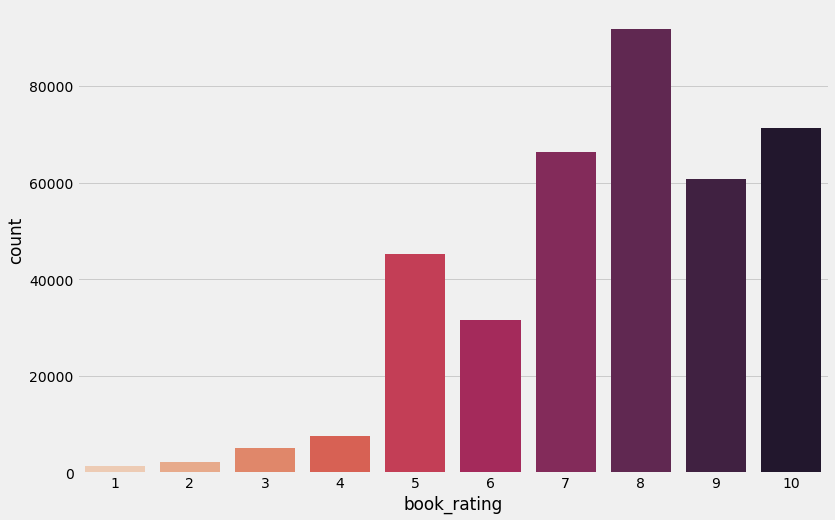

In [29]:
print(ratings_new.shape)
print(ratings_explicit.shape)
print(ratings_implicit.shape)
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12, 8))
sns.countplot(data=ratings_explicit , x='book_rating', palette='rocket_r')

In [ ]:
ratings_count = pd.DataFrame(ratings_explicit.groupby(['isbn'])['book_rating'].sum())
top10 = ratings_count.sort_values('book_rating', ascending = False).head(10)

top10.merge(books_f, left_index = True, right_on = 'isbn')


In [30]:
#Similarly segregating users who have given explicit ratings from 1-10 and those whose implicit behavior was tracked
users_exp_ratings = users_f[users_f['user_id'].isin(ratings_explicit['user_id'])]
users_imp_ratings = users_f[users_f['user_id'].isin(ratings_implicit['user_id'])]

In [31]:
#checking shapes
print(users_f.shape)
print(users_exp_ratings.shape)
print(users_imp_ratings.shape)

(278858, 4)
(68091, 4)
(52451, 4)


# 5  . Save data

In [32]:
## Saving the new clean data set under 'books_final' as a new csv file.
ratings.to_csv(r'C:\Users\ASUS\Data Analytics\Projects\Recommended-Reading\rating_final.csv')